### Reading Dataset

In [8]:
import pandas as pd 

data = pd.read_csv("shampoo.csv")
data = data["Sales"]

### Dividing the Dataset into Training & Test Set

In [9]:
size = int(len(data) * 0.80)
train, test = data[:size], data[size:]

### Plotting ACF & PACF

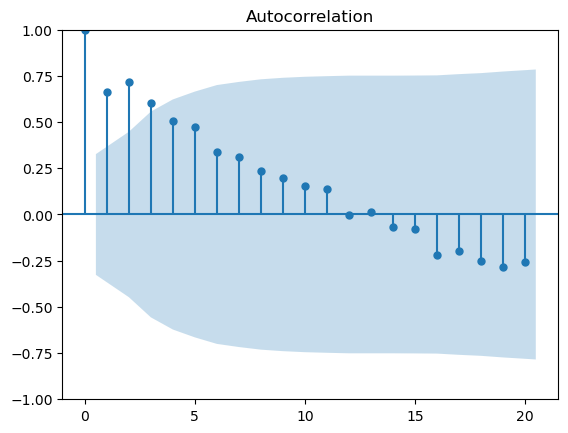

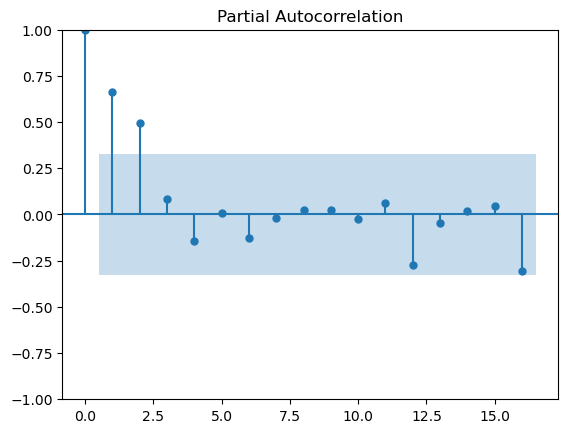

In [10]:
# import statsmodels.api as sm
# sm.graphics.tsa.plot_acf(data, lags = 10)
# sm.graphics.tsa.plot_pacf(data, lags = 10)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data, lags=20)
plot_pacf(data)
plt.show()

### Finding Optimal p, d, q

In [11]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

import itertools
p = d = q = range(0, 5)
pdq_combinations = list(itertools.product(p, d, q))

min_rmse = 10 ** 9
optimal_pdq = (0, 0, 0)

for pdq in pdq_combinations:
    try: 
        model = ARIMA(train, order = pdq).fit()
        predict = model.forecast(len(test))
        error = np.sqrt(mean_squared_error(test, predict))
        if error < min_rmse:
            min_rmse = error
            optimal_pdq = pdq
    except:
        continue

print(optimal_pdq, min_rmse)

(2, 3, 4) 78.63593682964115


### Training the model with Train dataset

In [12]:
model = ARIMA(train, order = optimal_pdq).fit()

In [13]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(2, 3, 4)   Log Likelihood                -144.719
Date:                Thu, 25 Jan 2024   AIC                            303.438
Time:                        08:03:48   BIC                            311.970
Sample:                             0   HQIC                           305.804
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3215      0.785     -1.684      0.092      -2.859       0.216
ar.L2         -0.3385      0.316     -1.072      0.284      -0.957       0.280
ma.L1         -1.9681     68.375     -0.029      0.9

### Actual vs Predict

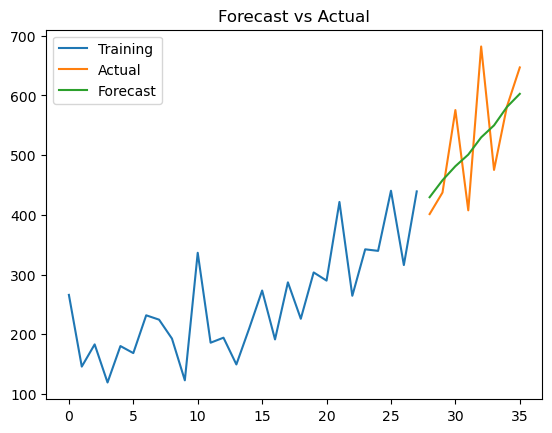

In [14]:
predict = model.forecast(len(test))

plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(predict, label = "Forecast")
plt.title("Forecast vs Actual")
plt.legend()
plt.show()